<a href="https://colab.research.google.com/github/PsorTheDoctor/Sekcja-SI/blob/master/neural_networks/SOM/digit_recognition_som.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOM - Self-Organising Maps: MNIST

### Przygotowanie danych

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from imageio import imwrite

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.preprocessing import StandardScaler
from PIL import Image, ImageChops

In [2]:
!pip install SimpSOM

  Created wheel for SimpSOM: filename=SimpSOM-1.3.4-cp36-none-any.whl size=17086 sha256=7448e41a2c530671f567e009a771e5c9adc78c6868d41a96563a3a48583d57ce
  Stored in directory: /root/.cache/pip/wheels/51/76/ee/c02f0bc20af4cd8f46ee4142ebf7bb654b737d6d8f2360d26b
Successfully built SimpSOM


In [0]:
import SimpSOM as sps

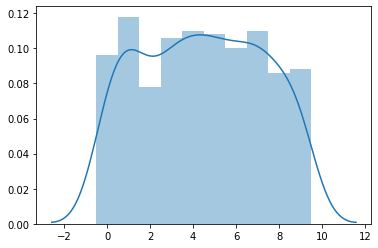

In [5]:
np.random.seed(0)

train = pd.read_csv('train.csv')
train = train.sample(n=500, random_state=0)
labels = train['label']
train = train.drop('label', axis=1)

sns.distplot(labels.values, bins=np.arange(-0.5, 10.5, 1))

# Normalizacja danych, istotny krok do właściwego działania algorytmu SOM
trainSt = StandardScaler().fit_transform(train.values)

Periodic Boundary Conditions active.
The weights will be initialised with PCA.


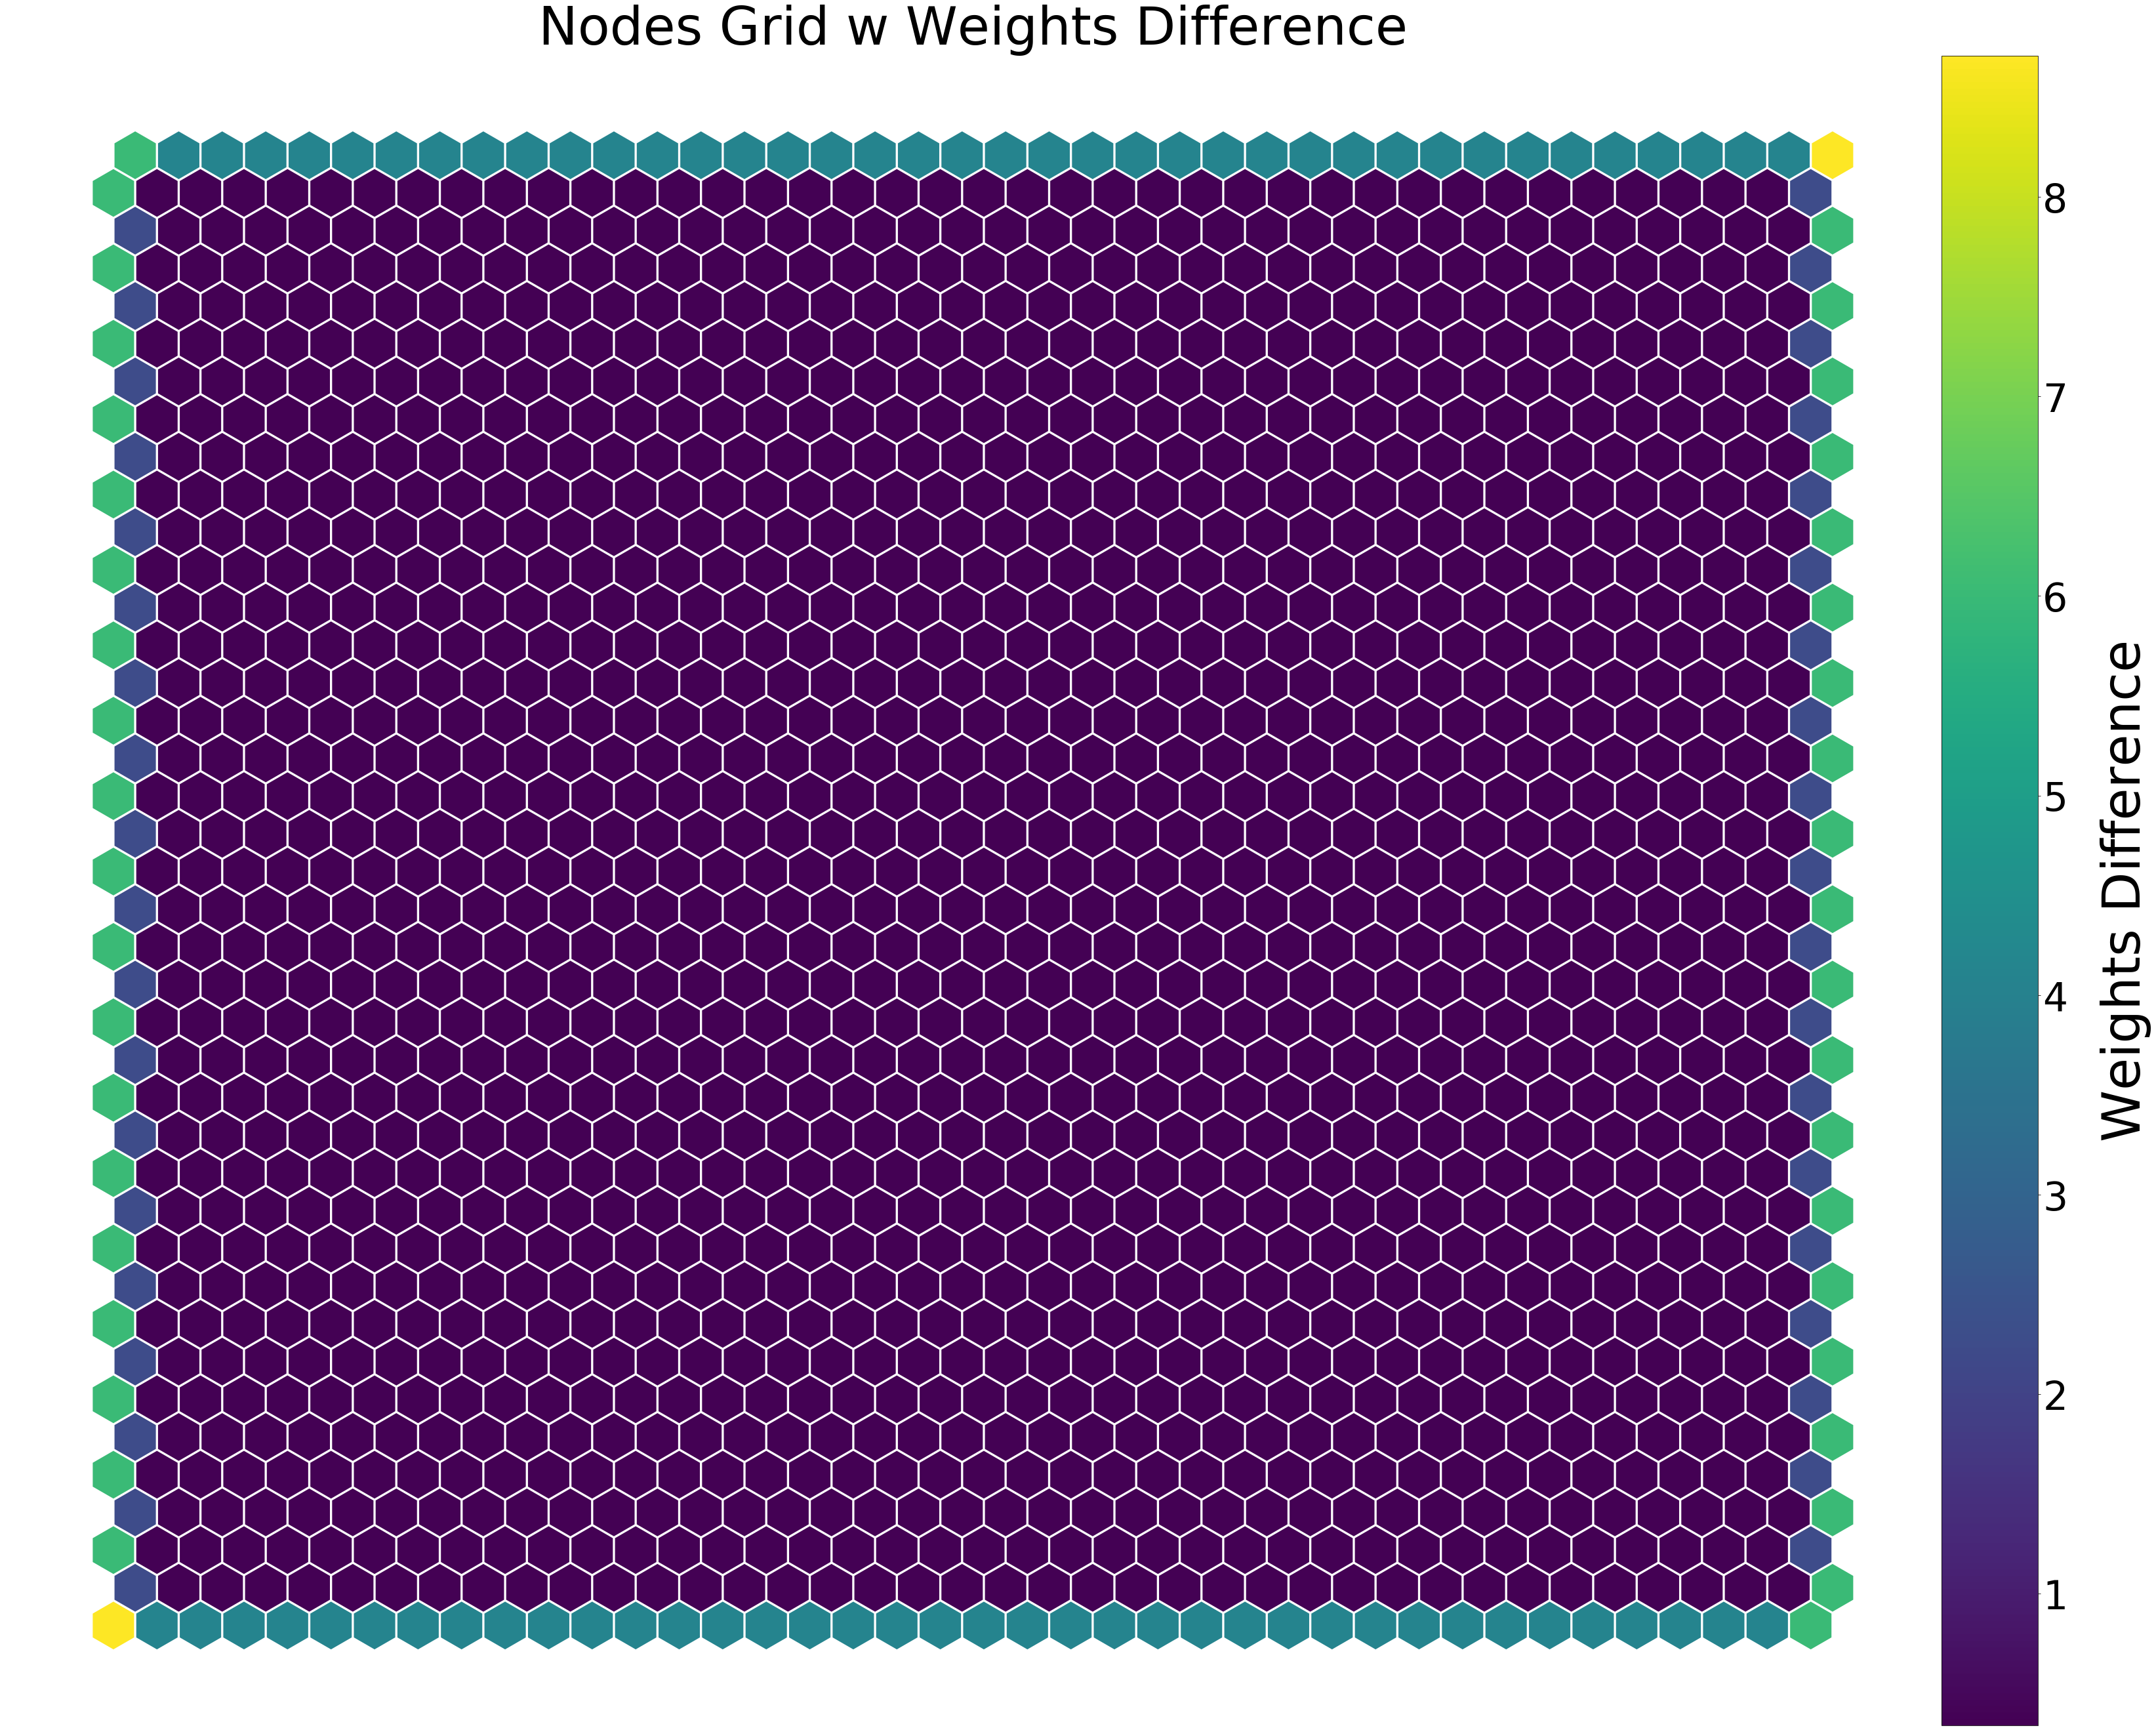

<Figure size 432x288 with 0 Axes>

In [13]:
# Budowa sieci 40x40 i inicjalizacja jej wag z PCA
net = sps.somNet(40, 40, trainSt, PBC=True, PCI=True)

# Wyprintowanie mapy przed treningiem
net.diff_graph(show=True, printout=True)

### Trenowanie mapy

In [14]:
# Trenowanie sieci ze współczynnikiem uczenia 0.1 dla 1000 epok
net.train(0.1, 1000)

Training SOM... done!


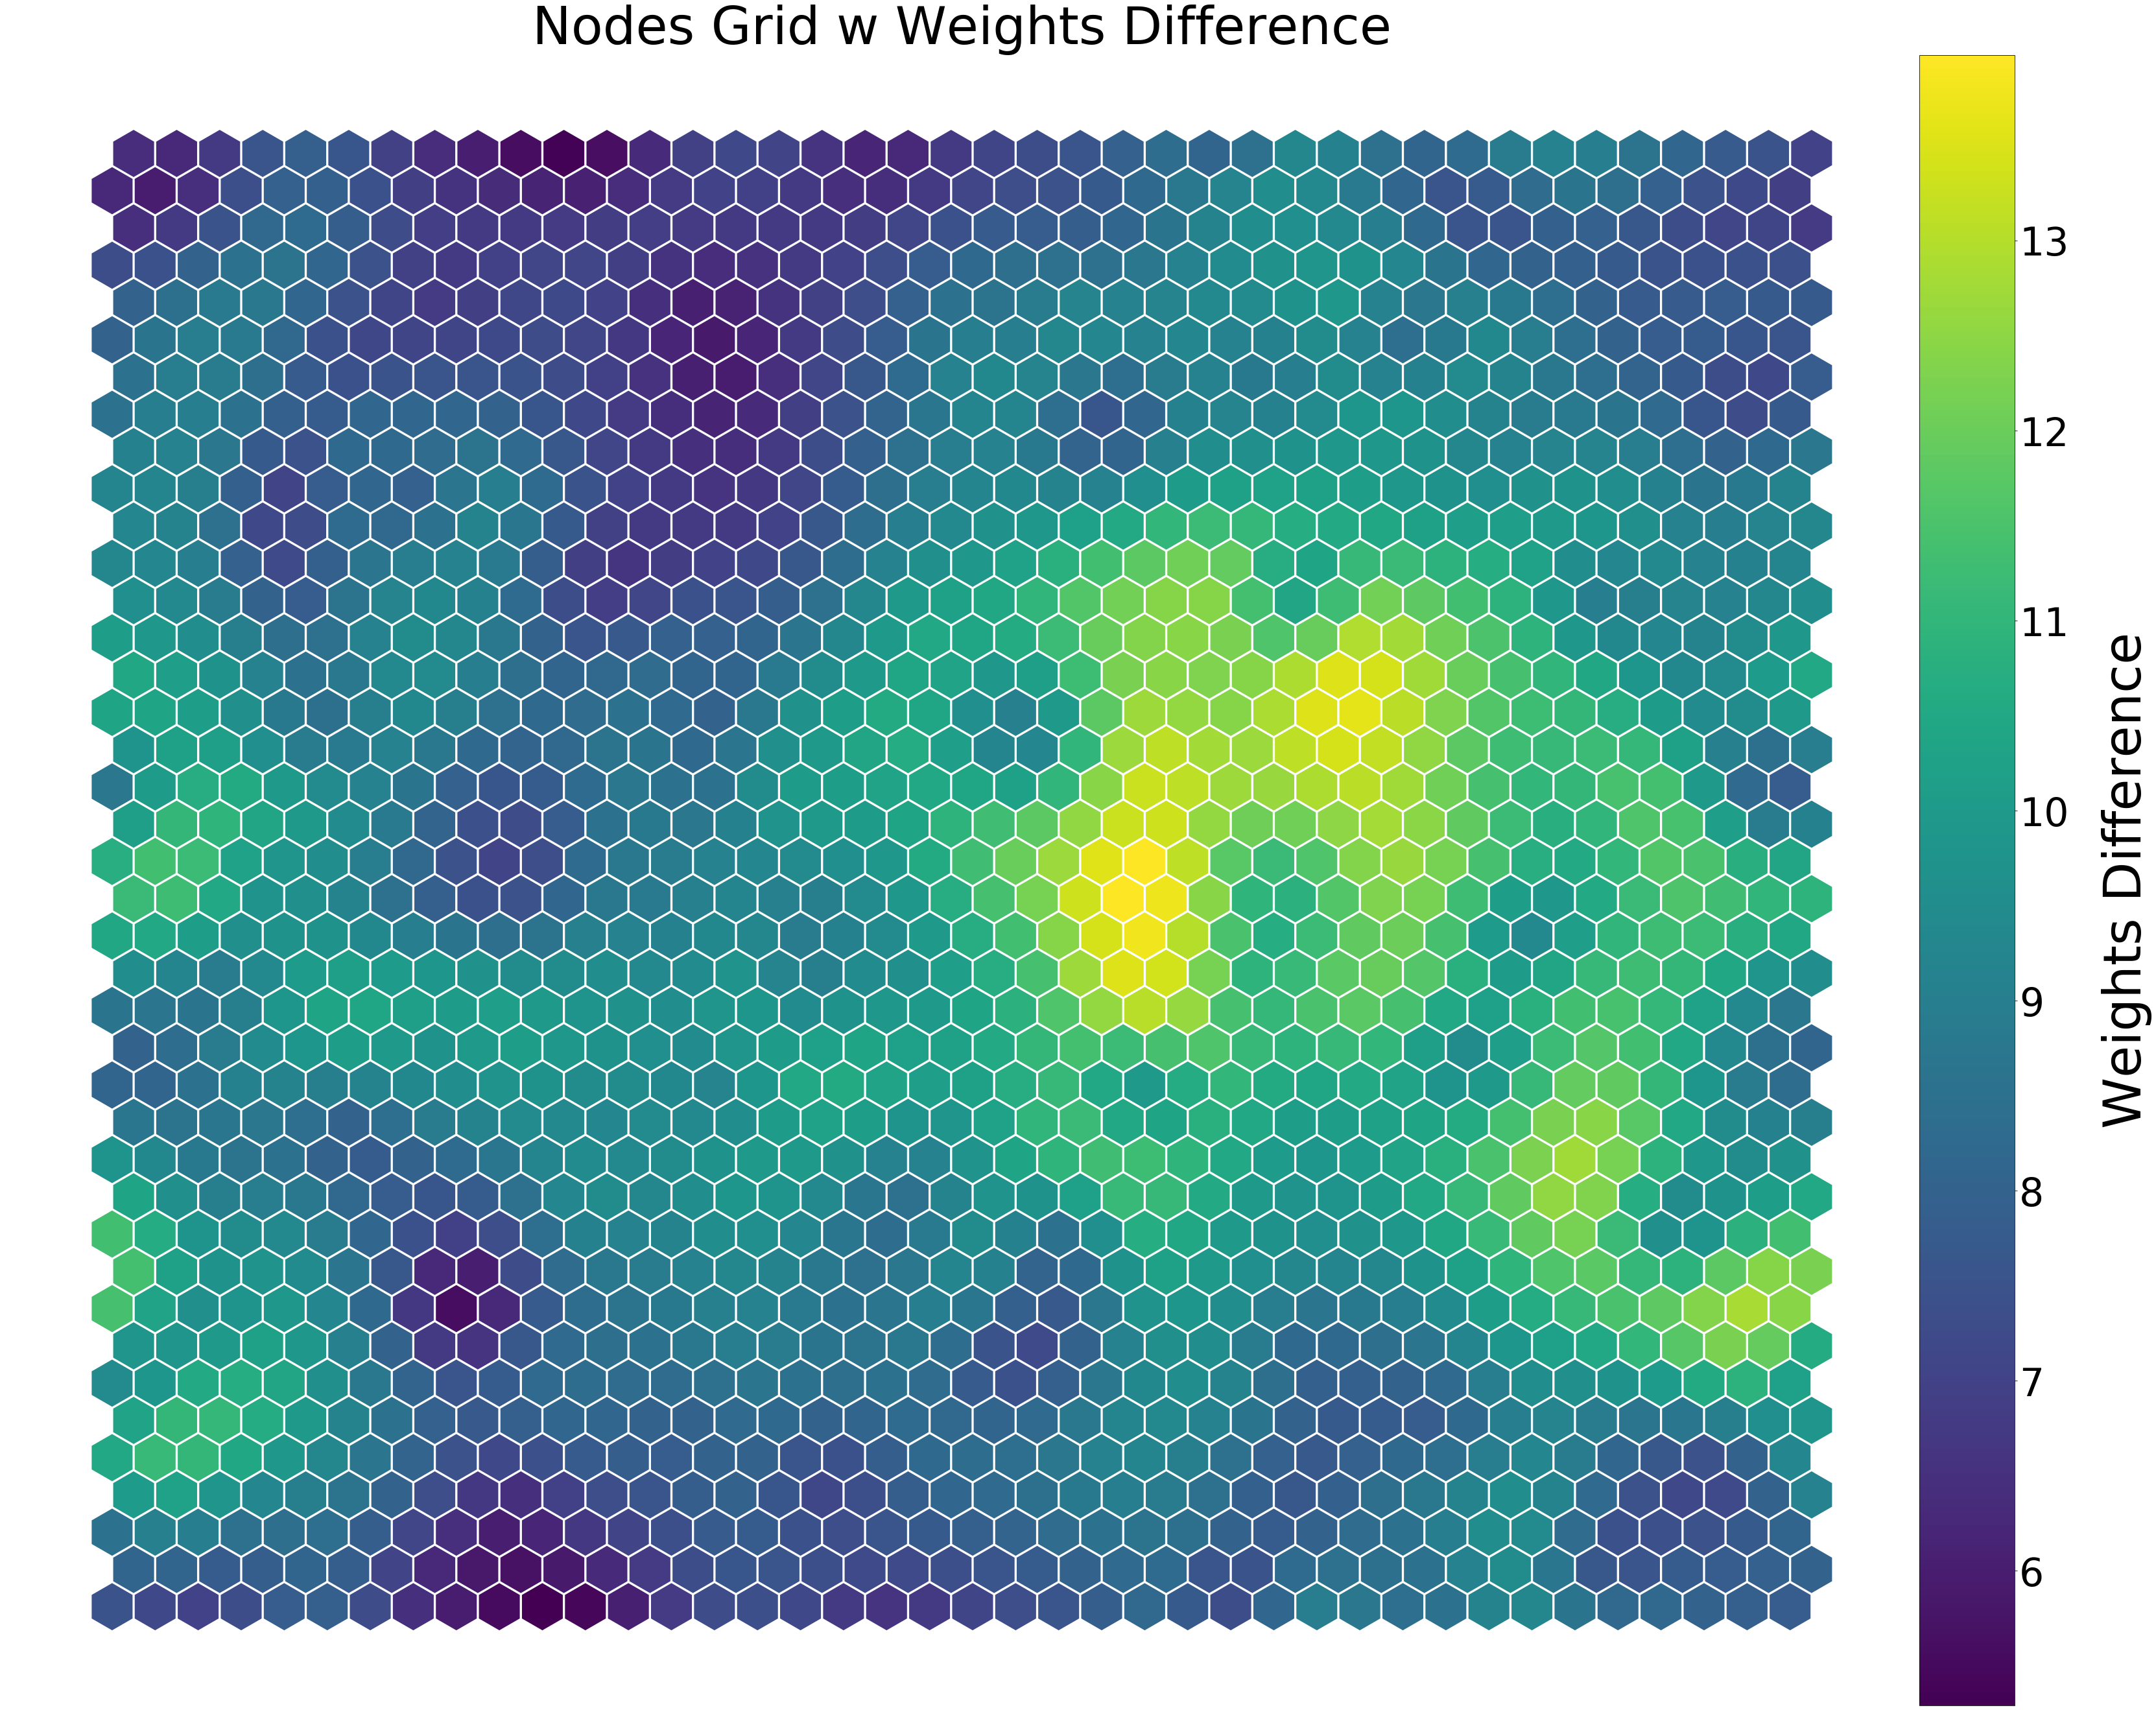

<Figure size 432x288 with 0 Axes>

In [15]:
# Wyprintowanie mapy różnic wag między korzeniami, co pozwoli nam zidentyfikować środki klastrów
net.diff_graph(show=True, printout=True)

### Wizualizacja wyników

In [0]:
# Najpierw zdefiniujmy kilka przydatnych funkcji
def autocrop(fileName):
  im = Image.open(fileName)
  im = im.crop((0, 100, 2900, im.size[1]))
  bg = Image.new(im.mode, im.size, im.getpixel((0, 0)))
  diff = ImageChops.difference(im, bg)
  diff = ImageChops.add(diff, diff, 2.0, -100)
  bbox = diff.getbbox()
  if bbox:
    return im.crop(bbox)

def posCount(x, y):
  return y * 40 + x

def posCountR(x):
  return [np.int(x % 40), np.int(x / 40)]

Pozycja korzenia: 1 1


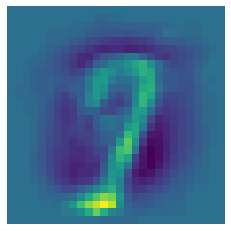

Pozycja korzenia: 6 1


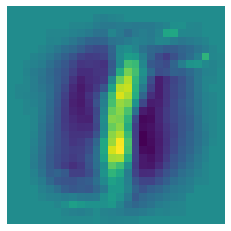

Pozycja korzenia: 11 23


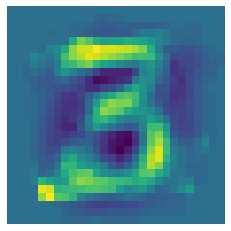

Pozycja korzenia: 31 18


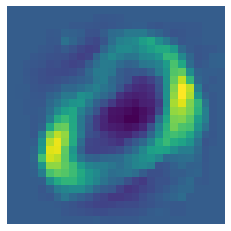

Pozycja korzenia: 33 7


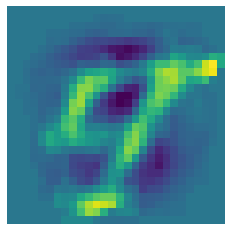

Pozycja korzenia: 37 13


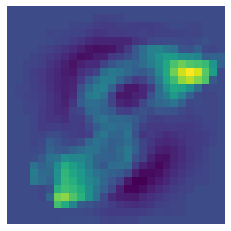

In [17]:
# Wyprintowanie kilku wag przetrenowanych korzeni, by zobaczyć jak dobre są
listNodes = [[1,1], [23,11], [1,6], [13,37], [7,33], [18,31]]
listCount = [posCount(1,1), posCount(23,11), posCount(1,6), posCount(13,37), posCount(7,33), posCount(18,31)]

i = 0 
for node in net.nodeList:
  if i in listCount:
    print('Pozycja korzenia: {:d} {:d}'.format(posCountR(i)[1], posCountR(i)[0]))
    plt.imshow(np.asarray(node.weights).reshape(28, 28))
    plt.axis('off')
    plt.show()
  i += 1

### Źródło:
[https://www.kaggle.com/asparago/unsupervised-learning-with-som](https://www.kaggle.com/asparago/unsupervised-learning-with-som)